<a href="https://colab.research.google.com/github/jvataidee/PesquisaOperacional/blob/master/maxloglihood_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://bsbr.com.br/wp-content/uploads/2018/05/01_logo-bsbr-padrao-med.png" alt="Texto alternativo" width="150" height="50" />




#Maximum Likelihood Estimation - MLE
Equipe: 
* Daniella Tombi
* Geraldo Jorge 
* João Ataide
* Leonardo Ciotti 
* Lucas Tayrone 
* Robson Nascimento

In [257]:
!pip install yfinance -q

In [258]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

## Baixando ações da bolsa 

* AAPL - Apple Inc. - Empresa multinacional de tecnologia com sede nos Estados Unidos, conhecida por seus produtos eletrônicos e software, como o iPhone, iPad, Mac e iOS.
* AMZN - Amazon.com, Inc. - Empresa americana de comércio eletrônico e serviços de computação em nuvem, que também oferece streaming de vídeo e música, inteligência artificial e muito mais.
* GOOGL - Alphabet Inc. - A holding que possui o Google, uma das maiores empresas de tecnologia e serviços de Internet do mundo, incluindo o mecanismo de pesquisa Google, YouTube, Android e outras plataformas e produtos.
* TSLA - Tesla, Inc. - Empresa americana de veículos elétricos e energia limpa, conhecida por seus carros elétricos, baterias de armazenamento de energia e soluções de energia solar.
* PFE - Pfizer Inc. - Empresa farmacêutica multinacional americana, envolvida na descoberta, desenvolvimento e produção de medicamentos e vacinas para diversas áreas terapêuticas.
* BA - The Boeing Company - Uma das maiores fabricantes de aeronaves e equipamentos de defesa do mundo, com sede nos Estados Unidos.
* PETR4.SA - Petróleo Brasileiro S.A. (Petrobras) - Empresa estatal brasileira de exploração, produção e distribuição de petróleo e gás.
* VALE3.SA - Vale S.A. - Uma das maiores empresas de mineração e metais do mundo, com sede no Brasil, envolvida na extração de minério de ferro, níquel, cobre e outros metais.
* EMBR3.SA - Embraer S.A. - Empresa brasileira de aeronáutica e defesa, fabricante de aeronaves comerciais, executivas, militares e agrícolas.
* SLCE3.SA - SLC Agrícola S.A. - Empresa agrícola brasileira, focada na produção de commodities agrícolas, como algodão, soja e milho.

In [259]:
tickers = ['AAPL', 'AMZN', 'GOOGL', 'TSLA', 'PFE', 'BA', 'PETR4.SA', 'VALE3.SA',
           'EMBR3.SA', 'SLCE3.SA']
end_date = pd.Timestamp.now()
start_date = end_date - pd.DateOffset(years=1)
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data.head()

[*********************100%***********************]  10 of 10 completed


,AAPL,AMZN,BA,EMBR3.SA,GOOGL,PETR4.SA,PFE,SLCE3.SA,TSLA,VALE3.SA
Date,,,,,,,,,,
2022-03-25,173.667984,164.773499,188.949997,15.19,141.673004,18.876240,51.039921,44.317539,336.880005,88.291336
2022-03-28,174.542679,168.990494,188.160004,15.09,141.455505,18.467159,51.523434,44.374355,363.946655,88.393311
2022-03-29,177.882462,169.315002,193.800003,15.62,142.505493,18.876240,51.001236,44.866776,366.523346,87.633064
2022-03-30,176.699615,166.300995,194.910004,15.25,141.938507,19.279482,50.711128,46.306149,364.663330,88.884712
2022-03-31,173.558655,162.997498,191.500000,14.96,139.067505,19.548306,50.063213,47.158409,359.200012,88.634377


In [260]:
ticker_colors = {
    'AAPL': '#4D4D4D',   # Apple logo color (gray)
    'AMZN': '#0080FF',   # Amazon logo color (bright blue)
    'GOOGL': '#DB4437',  # Google logo color (red)
    'TSLA': '#CC0000',   # Tesla logo color (bright red)
    'PFE': '#00B0F0',    # Pfizer logo color (light blue)
    'BA': '#0070C0',     # Boeing logo color (dark blue)
    'PETR4.SA': '#8B0000', # Petrobras logo color (dark red)
    'VALE3.SA': '#32CD32', # Vale logo color (lime green)
    'EMBR3.SA': '#9400D3', # Embraer logo color (dark violet)
    'SLCE3.SA': '#228B22'  # SLC Agrícola logo color (forest green)
}


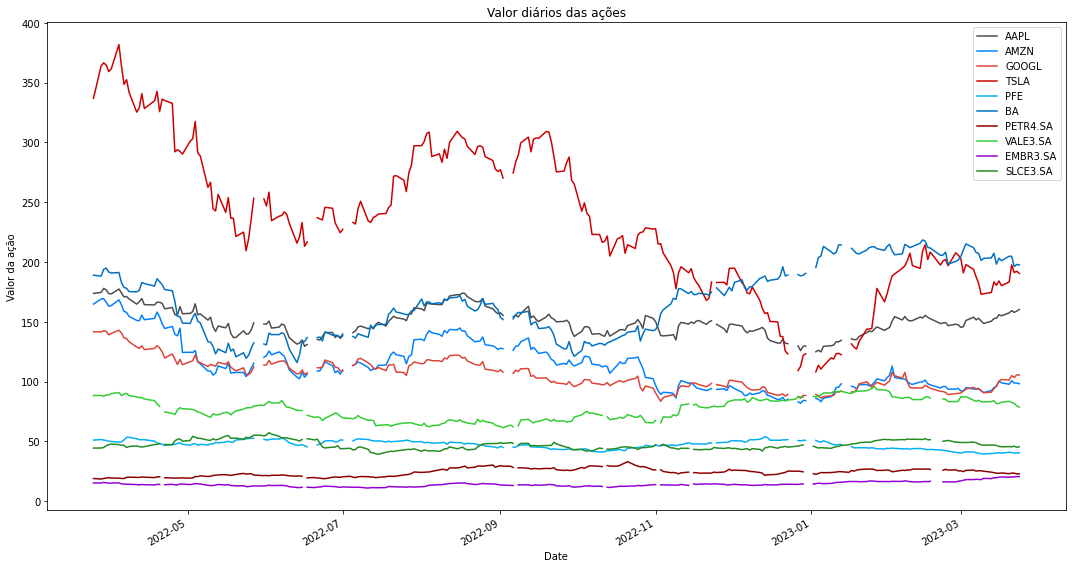

In [261]:
fig, ax = plt.subplots(figsize=(15, 8))

for ticker in tickers:
    data[ticker].plot(ax=ax, label=ticker, color=ticker_colors[ticker])

ax.set_ylabel("Valor da ação")
ax.set_title("Valor diários das ações")
ax.legend()
plt.tight_layout()
plt.show()

## Calculando Retornos

Calculando agora o retorno a partir da variação percentual entre a série histórica da bolsa, referente de um dia para o outro.

In [262]:
# Calcular retornos diários
returns = data.pct_change().dropna()
returns.head()

,AAPL,AMZN,BA,EMBR3.SA,GOOGL,PETR4.SA,PFE,SLCE3.SA,TSLA,VALE3.SA
Date,,,,,,,,,,
2022-03-28,0.005037,0.025593,-0.004181,-0.006583,-0.001535,-0.021672,0.009473,0.001282,0.080345,0.001155
2022-03-29,0.019134,0.001920,0.029974,0.035123,0.007423,0.022152,-0.010135,0.011097,0.007080,-0.008601
2022-03-30,-0.006650,-0.017801,0.005728,-0.023688,-0.003979,0.021362,-0.005688,0.032081,-0.005075,0.014283
2022-03-31,-0.017776,-0.019865,-0.017495,-0.019016,-0.020227,0.013944,-0.012777,0.018405,-0.014982,-0.002816
2022-04-01,-0.001718,0.003451,-0.003864,0.006685,0.007788,-0.013154,-0.003863,0.011647,0.006487,0.014226


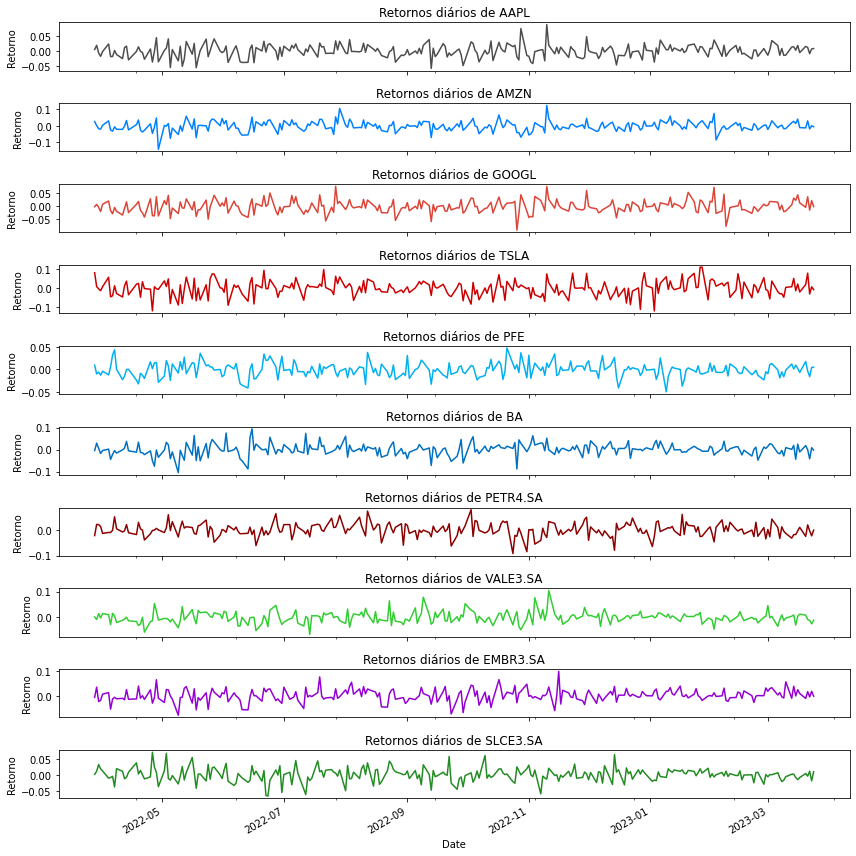

In [263]:
fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(12, 12), sharex=True)

for i, ticker in enumerate(tickers):
    returns[ticker].plot(ax=axes[i], title=f'Retornos diários de {ticker}', color=ticker_colors[ticker])
    axes[i].set_ylabel('Retorno')

plt.tight_layout()
plt.show()

Definindo a função `neg_log_likelihood` para calcular o valor negativo da função de log-verossimilhança para uma distribuição normal, dados um conjunto de parâmetros (média `mu` e desvio padrão `sigma`) e os dados observados. Essa função é geralmente usada em conjunto com um algoritmo de otimização para encontrar os parâmetros que minimizam a função de log-verossimilhança negativa, o que, por sua vez, maximiza a função de log-verossimilhança original.

A função aceita dois argumentos: params, que é uma lista ou array contendo os parâmetros da distribuição normal (`mu` e `sigma`) e data, que é uma lista ou array contendo os dados observados.

In [264]:
def neg_log_likelihood(params, data):
    mu, sigma = params
    return -np.sum(norm.logpdf(data, mu, sigma))

Agora iremos realizar uma execução com base nas ações para minimizar o erro, e estimar a verossimilhança, encontrando os valores ótimos para `mu` e `sigma`.

In [265]:
# Estimar os parâmetros MLE para cada ticker
params = []
for ticker in tickers:
    ret = returns[ticker]
    init_params = np.array([0, 1])
    result = minimize(neg_log_likelihood, init_params, args=(ret), bounds=((None, None), (1e-5, None)))
    params.append(result.x)

Desta forma, com base no `mu` e `sigma` são utilizados para calcular a distribuição cumultativa (CDF) da distribuição normal e assim conseguir calcular a probabilidade de sucesso e risco.

A função CDF representa a probabilidade de um valor aleatório, neste contexto a representação do retorno dos ativos, essa probabilidade pode se rinterpretada como probabilidade de sucesso, ou seja, a probabilidade de obter um retorno positivo.

Já o risco é calculado como um complemento para probabilidade de sucesso, ou seja, a probabilidade de obter um retorno negativo.

In [266]:
# Calcular a probabilidade de sucesso e risco
results = []
for i, ticker in enumerate(tickers):
    mu, sigma = params[i]
    success_prob = norm.cdf(0, mu, sigma)
    risk = 1 - success_prob
    results.append((ticker, success_prob, risk))

Agora ordenando os resultado avaliando as açoes, temos então o resuldo a seguir:

In [267]:
def risk_color_style(row):
    risk_colors = []
    for i, value in enumerate(row):
        if i == 2:  # Índice da coluna 'Risco'
            if row.name < 5:  # Os 5 primeiros itens
                risk_colors.append('background-color: green')
            else:
                risk_colors.append('background-color: red')
        else:
            risk_colors.append('')
    return risk_colors


In [269]:
# Criar um DataFrame com os resultados
df_results = pd.DataFrame(results, columns=['Ticker', 'Probabilidade de Sucesso', 'Risco'])

# Ordenar os resultados com base na maior probabilidade de sucesso
df_results.sort_values(by='Risco', ascending=True, inplace=True)

# Exibir o DataFrame
df_results_styled = df_results.style.apply(risk_color_style, axis=1)

df_results_styled

,Ticker,Probabilidade de Sucesso,Risco
1,AMZN,0.520885,0.479115
4,PFE,0.520313,0.479687
2,GOOGL,0.513778,0.486222
3,TSLA,0.512909,0.487091
7,VALE3.SA,0.503837,0.496163
0,AAPL,0.501491,0.498509
9,SLCE3.SA,0.493930,0.506070
5,BA,0.491978,0.508022
6,PETR4.SA,0.483455,0.516545
8,EMBR3.SA,0.476639,0.523361
